In [11]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

X_train, X_valid, y_train,  y_valid = train_test_split(X_train_full, y_train_full, test_size = 0.25)

print(X_train.shape, y_train.shape)

(45000, 28, 28) (45000,)


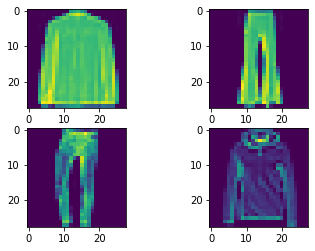

In [12]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(2, 2)
ax[0][0].imshow(X_train[0])
ax[0][1].imshow(X_train[1])
ax[1][0].imshow(X_train[2])
ax[1][1].imshow(X_train[3])

## Learning rate schedules

Learning rate scehduling is a technical to gradualy descrease/increase learning rate during training. It normally can be done with a decay parameter in optimiser or can be defined as a callback function. The typicall scheduling are:

- Power Scheduling: lr(t) = lr(0) / (1 + t/s)^c (typically c is 0, and s is step)
- Exponential Scheduling: lr(t) = lr(0)*0.1^(t/s) (gradual drop by a factor of 10 every s steps)
- Piecewise constant scheduleing: use a constant learning rate for a number of epochs then reduce to a smaller one, and so on
- Performance schedulling: Measure the validation error every N steps and reduce rate by a factor of lambda when error stops dropping
- 1cycle scheduling, basically start off with a small lr0, gradually (linearly) increase it to a larger lr1 and reduce again half way through the training. 

According to a 2013 paper by Andrew Senior et al, the schedules performed the best are performance schduleing and exponential schedule. With a slight favour in exponential schedule.

When saving a model, the customised schedule function will start from epoch 0. To resove this issue, we can us the initial_epoch value as part of fit().

In [17]:
from tensorflow.keras import activations, layers, initializers, callbacks, models
from tensorflow.keras.layers import Flatten, Dense, LeakyReLU, BatchNormalization, ReLU, ELU
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, LearningRateScheduler
from tensorflow.keras.optimizers import SGD, Adagrad, RMSprop, Adam, Nadam, Adamax
from tensorflow import keras

es_cb = EarlyStopping(patience=3, monitor='val_loss') # early stopping at min loss
md_cb = ModelCheckpoint("f_mnist_model_A.h5", save_best_only=True) # setup a model check point

In [25]:
# simplist version of schedule, adding decay
sgd_vanilla_with_decay = SGD(lr = 1e-3, decay = 1e-4)

# customised schedule
def exponential_decay_fn(epoch, lr0 = 0.01, s=20):
    return lr0 * 0.1 ** (epoch / s)

lr_scheduler = LearningRateScheduler(exponential_decay_fn)

# pre-defined schedule
lr_performance_schedule = keras.callbacks.ReduceLROnPlateau(factor = 0.5, patience = 5)

s = 20 * len(X_train)
lr_exponential = keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1)

In [ ]:
sgd_vanilla = SGD(lr = 1e-3) # stochastic gradient descent

keras.backend.clear_session()    
initializer = keras.initializers.LecunNormal()
model = Sequential([
    Flatten(input_shape=[28, 28]),
    BatchNormalization(),
    Dense(300, activation = "selu", kernel_initializer = initializer),
    Dense(300, activation = "selu", kernel_initializer = initializer),
    Dense(300, activation = "selu", kernel_initializer = initializer),
    Dense(10, activation = "softmax")
])

NUM_EPOCHS = 20

model.compile(optimizer =  "adam", loss = "sparse_categorical_crossentropy", metrics = "accuracy")
history = model.fit(X_train, y_train, epochs=NUM_EPOCHS, validation_data = (X_valid, y_valid), callbacks = [lr_scheduler],
                    verbose = True)
print(model.evaluate(X_test, y_test))

Epoch 1/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.6026 - accuracy: 0.7996 - val_loss: 0.3851 - val_accuracy: 0.8601
Epoch 2/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.4181 - accuracy: 0.8466 - val_loss: 0.4101 - val_accuracy: 0.8607
Epoch 3/20
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3521 - accuracy: 0.8678 - val_loss: 0.3554 - val_accuracy: 0.8717
Epoch 4/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3039 - accuracy: 0.8834 - val_loss: 0.3303 - val_accuracy: 0.8843
Epoch 5/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.2561 - accuracy: 0.9020 - val_loss: 0.3274 - val_accuracy: 0.8963
Epoch 6/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.2130 - accuracy: 0.9185 - val_loss: 0.2916 - val_accuracy: 0.9013
Epoch 7/20
1407/1407 [==============================] - 4s 3ms/step - loss: 0.1870 - accuracy: 0.9295 - val_loss: 0.2940 - val_accuracy:

### Version Control

In [26]:
!git add 7_learning_rate_scheduling.ipynb
!git commit -m "added learn rate schedule"
!git push

The file will have its original line endings in your working directory


[master 5b443f4] added learn rate schedule
 1 file changed, 16 insertions(+), 8 deletions(-)


To https://github.com/auslei/python.git
   e0c86e8..5b443f4  master -> master
